In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
from us import states

In [90]:
# Set API key
c = Census("736d0b43db328f7d01733bcff52a193181f4e05b")

In [91]:
# Obtain Census variables from the 2014 ACS at the tract level for the Commonwealth of Illinois (FIPS code: 17)
# C17002_001E: count of ratio of income to poverty in the past 12 months (total)
# C17002_002E: count of ratio of income to poverty in the past 12 months (< 0.50)
# C17002_003E: count of ratio of income to poverty in the past 12 months (0.50 - 0.99)
# C17002_004E: count of ratio of income to poverty in the past 12 months (1.00 - 1.24)
# C17002_005E: count of ratio of income to poverty in the past 12 months (1.25 - 1.49)
# C17002_006E: count of ratio of income to poverty in the past 12 months (1.50 - 1.84)
# C17002_007E: count of ratio of income to poverty in the past 12 months (1.85 - 1.99)
# C17002_008E: count of ratio of income to poverty in the past 12 months (>= 2.00)
# B01003_001E: total population
# Sources: https://api.census.gov/data/2014/acs/acs5/variables.html; https://pypi.org/project/census/
il_census = c.acs5.state_county_tract(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'C17002_004E', 'C17002_005E', 'C17002_006E', 'C17002_007E', 'C17002_008E', 'B01003_001E'),
                                      state_fips = states.IL.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2014)

In [92]:
# Create a dataframe from the census data
il_df = pd.DataFrame(il_census)

# Show the dataframe
print(il_df.head(2))
print('Shape: ', il_df.shape)

                                          NAME  C17002_001E  C17002_002E  \
0     Census Tract 2407, Cook County, Illinois       1427.0         66.0   
1  Census Tract 8221.02, Cook County, Illinois       4580.0        182.0   

   C17002_003E  C17002_004E  C17002_005E  C17002_006E  C17002_007E  \
0        440.0         18.0         35.0         49.0         33.0   
1        249.0         76.0        171.0        141.0         37.0   

   C17002_008E  B01003_001E state county   tract  
0        786.0       1427.0    17    031  240700  
1       3724.0       4752.0    17    031  822102  
Shape:  (3123, 13)


In [93]:
# Access shapefile of Illinois census tracts
il_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2014/TRACT/tl_2014_17_tract.zip")

# Reproject shapefile to UTM Zone 17N
# https://spatialreference.org/ref/epsg/wgs-84-utm-zone-17n/
il_tract = il_tract.to_crs(epsg = 32617)

# Print GeoDataFrame of shapefile
print(il_tract.head(2))
print('Shape: ', il_tract.shape)

# Check shapefile projection
print("\nThe shapefile projection is: {}".format(il_tract.crs))

  STATEFP COUNTYFP TRACTCE        GEOID NAME          NAMELSAD  MTFCC  \
0      17      161  022800  17161022800  228  Census Tract 228  G5020   
1      17      161  022900  17161022900  229  Census Tract 229  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  2097335       0  +41.4990973  -090.5473216   
1        S  1311567       0  +41.4897868  -090.5477824   

                                            geometry  
0  POLYGON ((-298188.911 4637960.938, -298186.924...  
1  POLYGON ((-298206.493 4637854.930, -298202.945...  
Shape:  (3123, 13)

The shapefile projection is: epsg:32617


In [94]:
# Combine state, county, and tract columns together to create a new string and assign to new column
il_df["GEOID"] = il_df["state"] + il_df["county"] + il_df["tract"]

In [95]:
# Print head of dataframe
il_df.head(2)

,NAME,C17002_001E,C17002_002E,C17002_003E,C17002_004E,C17002_005E,C17002_006E,C17002_007E,C17002_008E,B01003_001E,state,county,tract,GEOID
0,"Census Tract 2407, Cook County, Illinois",1427.0,66.0,440.0,18.0,35.0,49.0,33.0,786.0,1427.0,17,031,240700,17031240700
1,"Census Tract 8221.02, Cook County, Illinois",4580.0,182.0,249.0,76.0,171.0,141.0,37.0,3724.0,4752.0,17,031,822102,17031822102


In [96]:
# Remove columns
il_df = il_df.drop(columns = ["state", "county", "tract"])

# Show updated dataframe
il_df.head(2)

,NAME,C17002_001E,C17002_002E,C17002_003E,C17002_004E,C17002_005E,C17002_006E,C17002_007E,C17002_008E,B01003_001E,GEOID
0,"Census Tract 2407, Cook County, Illinois",1427.0,66.0,440.0,18.0,35.0,49.0,33.0,786.0,1427.0,17031240700
1,"Census Tract 8221.02, Cook County, Illinois",4580.0,182.0,249.0,76.0,171.0,141.0,37.0,3724.0,4752.0,17031822102


In [97]:
# Check column data types for census data
print("Column data types for census data:\n{}".format(il_df.dtypes))

# Check column data types for census shapefile
print("\nColumn data types for census shapefile:\n{}".format(il_tract.dtypes))

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Column data types for census data:
NAME            object
C17002_001E    float64
C17002_002E    float64
C17002_003E    float64
C17002_004E    float64
C17002_005E    float64
C17002_006E    float64
C17002_007E    float64
C17002_008E    float64
B01003_001E    float64
GEOID           object
dtype: object

Column data types for census shapefile:
STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object


In [98]:
# Join the attributes of the dataframes together
# Source: https://geopandas.org/docs/user_guide/mergingdata.html
il_merge = il_tract.merge(il_df, on = "GEOID")

# Show result
print(il_merge.head(2))
print('Shape: ', il_merge.shape)

  STATEFP COUNTYFP TRACTCE        GEOID NAME_x          NAMELSAD  MTFCC  \
0      17      161  022800  17161022800    228  Census Tract 228  G5020   
1      17      161  022900  17161022900    229  Census Tract 229  G5020   

  FUNCSTAT    ALAND  AWATER  ...  \
0        S  2097335       0  ...   
1        S  1311567       0  ...   

                                           NAME_y C17002_001E C17002_002E  \
0  Census Tract 228, Rock Island County, Illinois      3939.0       567.0   
1  Census Tract 229, Rock Island County, Illinois      2698.0       241.0   

  C17002_003E  C17002_004E  C17002_005E  C17002_006E  C17002_007E  \
0        73.0        171.0        148.0        290.0        145.0   
1       121.0         97.0        122.0        104.0        117.0   

   C17002_008E  B01003_001E  
0       2545.0       5872.0  
1       1896.0       2723.0  

[2 rows x 23 columns]
Shape:  (3123, 23)


In [99]:
# Create new dataframe from select columns
il_poverty_tract = il_merge[["STATEFP", "COUNTYFP", "TRACTCE", "GEOID", "geometry", "C17002_001E", "C17002_002E", "C17002_003E", "B01003_001E"]]

# Show dataframe
print(il_poverty_tract.head(2))
print('Shape: ', il_poverty_tract.shape)

  STATEFP COUNTYFP TRACTCE        GEOID  \
0      17      161  022800  17161022800   
1      17      161  022900  17161022900   

                                            geometry  C17002_001E  \
0  POLYGON ((-298188.911 4637960.938, -298186.924...       3939.0   
1  POLYGON ((-298206.493 4637854.930, -298202.945...       2698.0   

   C17002_002E  C17002_003E  B01003_001E  
0        567.0         73.0       5872.0  
1        241.0        121.0       2723.0  
Shape:  (3123, 9)


In [100]:
# Dissolve and group the census tracts within each county and aggregate all the values together
# Source: https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html
il_poverty_county = il_poverty_tract.dissolve(by = 'COUNTYFP', aggfunc = 'sum')

# Show dataframe
print(il_poverty_county.head(2))
print('Shape: ', il_poverty_county.shape)

/home/avasd/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


                                                   geometry  C17002_001E  \
COUNTYFP                                                                   
001       POLYGON ((-391762.973 4470369.619, -391733.574...      65416.0   
003       POLYGON ((-226909.596 4126217.221, -226864.444...       7508.0   

          C17002_002E  C17002_003E  B01003_001E  
COUNTYFP                                         
001            3464.0       5951.0      67113.0  
003            1450.0       1311.0       7821.0  
Shape:  (102, 5)


In [101]:
# Get poverty rate and store values in new column
il_poverty_county["Poverty_Rate"] = (il_poverty_county["C17002_002E"] + il_poverty_county["C17002_003E"]) / il_poverty_county["B01003_001E"] * 100

# Show dataframe
il_poverty_county.head(2)

,geometry,C17002_001E,C17002_002E,C17002_003E,B01003_001E,Poverty_Rate
COUNTYFP,,,,,,
001,"POLYGON ((-391762.973 4470369.619, -391733.574...",65416.0,3464.0,5951.0,67113.0,14.028579
003,"POLYGON ((-226909.596 4126217.221, -226864.444...",7508.0,1450.0,1311.0,7821.0,35.302391


Text(0.5, 1.0, 'Poverty Rates (%) in Illinois')

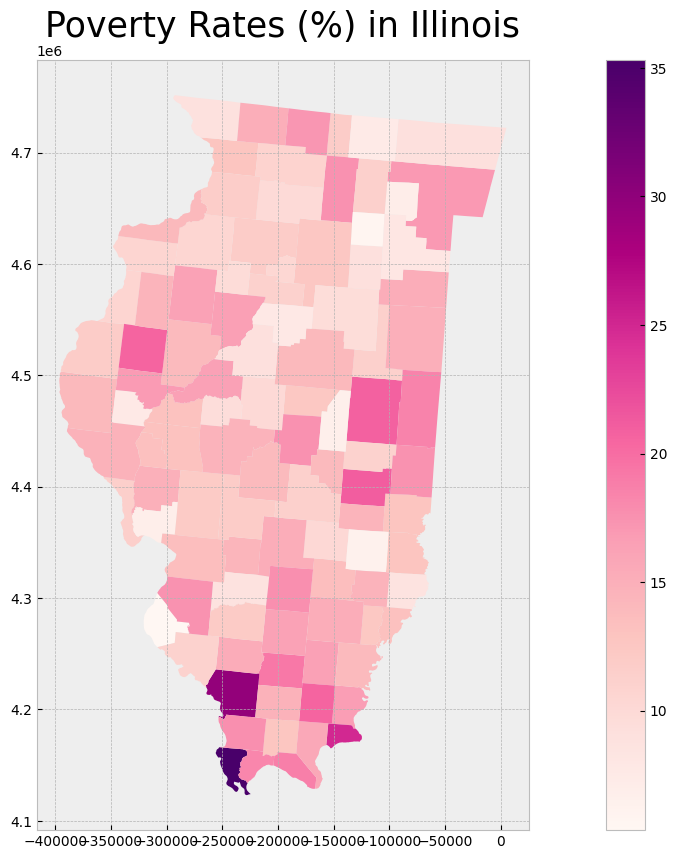

In [102]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
il_poverty_county.plot(column = "Poverty_Rate",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Poverty Rates (%) in Illinois', fontdict = {'fontsize': '25', 'fontweight' : '3'})